# Understanding Disability and Educational Attainment in India

* The purpose of this project is to analyze the distribution of disabled individuals across various educational levels, genders, types of disabilities, and geographic classifications (rural/urban) in India using data from the 2011 Census. The goal is to uncover patterns and disparities in education access for differently-abled populations, and to generate actionable insights for policymakers and organizations working in inclusive education and social development.

# Tools & Libraries Used
* Python
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Jupyter Notebook
* R
* SQL

## 1. Import Libraries + Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:
df = pd.read_csv('CleanedIndiaCensus2011.csv')

In [3]:
df.head(20)

,Area,Type,Educational Level,Count,Disability,Gender
0,Jammu & Kashmir,Rural,Illiterate,14276,Seeing,Males
1,Jammu & Kashmir,Rural,Literate,12743,Seeing,Males
2,Jammu & Kashmir,Rural,Literate But Below Primary,1696,Seeing,Males
3,Jammu & Kashmir,Rural,Primary But Below Middle,2901,Seeing,Males
4,Jammu & Kashmir,Rural,Middle But Below Matric/Secondary,3585,Seeing,Males
5,Jammu & Kashmir,Rural,Matric/Secondary But Below Graduate,3299,Seeing,Males
6,Jammu & Kashmir,Rural,Graduate And Above,713,Seeing,Males
7,Jammu & Kashmir,Urban,Illiterate,3228,Seeing,Males
8,Jammu & Kashmir,Urban,Literate,5409,Seeing,Males
9,Jammu & Kashmir,Urban,Literate But Below Primary,475,Seeing,Males


## 2. Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7840 entries, 0 to 7839
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Area               7840 non-null   object
 1   Type               7840 non-null   object
 2   Educational Level  7840 non-null   object
 3   Count              7840 non-null   int64 
 4   Disability         7840 non-null   object
 5   Gender             7840 non-null   object
dtypes: int64(1), object(5)
memory usage: 367.6+ KB


In [5]:
df.isnull().sum()

Area                 0
Type                 0
Educational Level    0
Count                0
Disability           0
Gender               0
dtype: int64

In [6]:
df.describe()

,Count
count,7840.000000
mean,5147.165051
std,14241.261471
min,0.000000
25%,68.000000
50%,603.000000
75%,3893.250000
max,246790.000000


In [7]:
df

,Area,Type,Educational Level,Count,Disability,Gender
0,Jammu & Kashmir,Rural,Illiterate,14276,Seeing,Males
1,Jammu & Kashmir,Rural,Literate,12743,Seeing,Males
2,Jammu & Kashmir,Rural,Literate But Below Primary,1696,Seeing,Males
3,Jammu & Kashmir,Rural,Primary But Below Middle,2901,Seeing,Males
4,Jammu & Kashmir,Rural,Middle But Below Matric/Secondary,3585,Seeing,Males
...,...,...,...,...,...,...
7835,Andaman & Nicobar Islands,Urban,Literate But Below Primary,9,Multiple Disability,Females
7836,Andaman & Nicobar Islands,Urban,Primary But Below Middle,7,Multiple Disability,Females
7837,Andaman & Nicobar Islands,Urban,Middle But Below Matric/Secondary,7,Multiple Disability,Females
7838,Andaman & Nicobar Islands,Urban,Matric/Secondary But Below Graduate,6,Multiple Disability,Females


In [8]:
df_area_sum = df.groupby('Area')['Count'].sum().sort_values(ascending=False).reset_index()
df_area_sum = df_area_sum[df_area_sum['Count'] > 0]

In [103]:
df_area_sum.sort_values(by='Count', ascending=False)

,Area,Count
0,Uttar Pradesh,6158047
1,Maharashtra,4810920
2,Bihar,3331965
3,Andhra Pradesh,3247544
4,West Bengal,3105856
5,Madhya Pradesh,2314898
6,Rajasthan,2141177
7,Karnataka,2050998
8,Odisha,1870671
9,Tamil Nadu,1841847


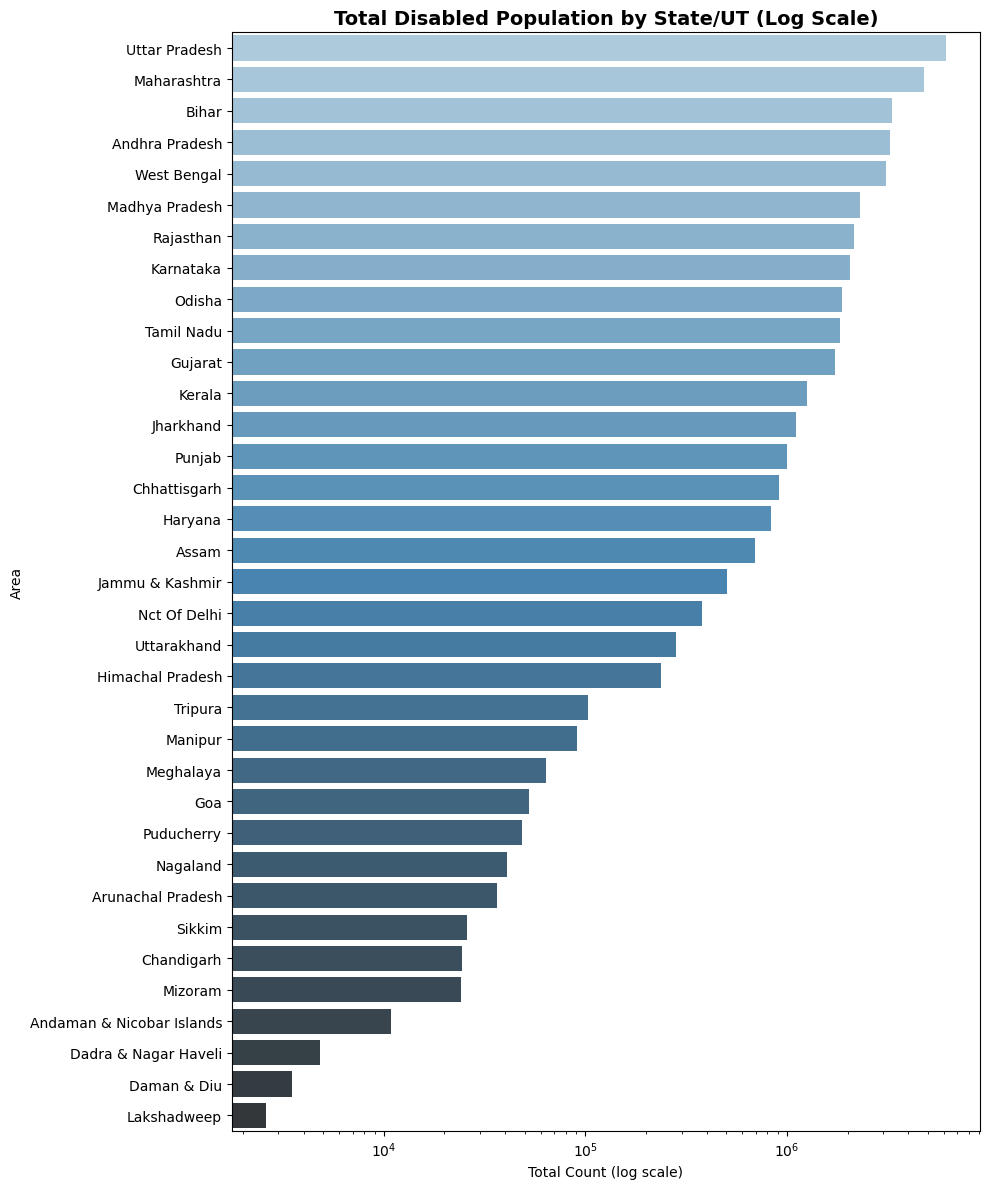

In [9]:
# Plotting bar graph
area_counts = df.groupby('Area')['Count'].sum().sort_values(ascending=False).reset_index()

plot.figure(figsize=(10, 12))
sns.barplot(data=area_counts, y='Area', x='Count', palette='Blues_d', hue='Area')
plot.xscale('log')  # Apply log scale
plot.xlabel('Total Count (log scale)')
plot.title('Total Disabled Population by State/UT (Log Scale)', fontsize=14, weight='bold')
plot.tight_layout()

### Insights:
* From the chart, it's clear that Uttar Pradesh reports the highest number of people with disabilities, while the Union Territory of Lakshadweep reports the lowest.
* In fact, the top 13 states each have disability counts in the millions, which highlights the scale of the issue.
* These numbers call for attention from both state and central government authorities to further investigate the underlying causes in the most affected regions.
* Departments such as the Census Bureau or Health Ministry should consider conducting region-specific health studies, possibly looking into the medical history of families or communities in high incidence areas.
* The reasons behind high disability counts could vary, potentially including genetic factors, environmental conditions, healthcare access or even the aftermath of natural or man-made disasters.

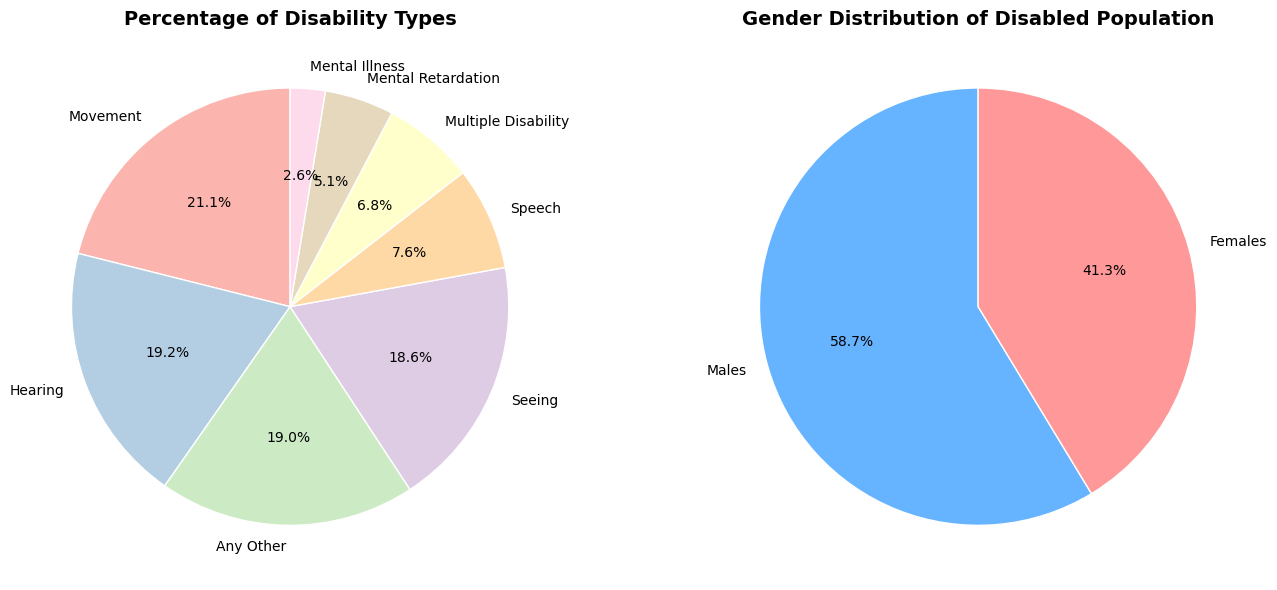

In [41]:
disability_total = df.groupby('Disability')['Count'].sum().sort_values(ascending=False)
gender_total = df.groupby('Gender')['Count'].sum().sort_values(ascending=False)

fig, axes = plot.subplots(1, 2, figsize=(14, 6))

# Pie chart for Disability
colors_disability = plot.cm.Pastel1(range(len(disability_total)))
disability_total.plot(kind='pie',
                      autopct='%.1f%%',
                      ax=axes[0],
                      colors=colors_disability,
                      startangle=90,
                      wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
axes[0].set_title('Percentage of Disability Types', fontsize=14, weight='bold')
axes[0].set_ylabel('')

# Pie chart for Gender
colors_gender = ['#66b3ff', '#ff9999']  
gender_total.plot(kind='pie',
                  autopct='%.1f%%',
                  ax=axes[1],
                  colors=colors_gender,
                  startangle=90,
                  wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
axes[1].set_title('Gender Distribution of Disabled Population', fontsize=14, weight='bold')
axes[1].set_ylabel('')

plot.tight_layout()

### Insights:
* Around 21% of individuals in the dataset are affected by movement disabilities, making it the most common type reported.
* Hearing, seeing, and other disabilities account for approximately 19% of the cases.
* The least reported disabilities are mental illness (3%) and mental retardation (5%).
* Given the high percentage of movement disabilities, it's important for the government or health authorities to investigate possible causes—such as accidents, nutritional deficiencies or complications during childbirth.
* At the same time, all types of disabilities require equal attention to understand their root causes and develop targeted solutions.
* The primary focus should be on reducing the overall prevalence of disabilities through early intervention, improved healthcare and awareness.
* The health department should consider launching policies and educational campaigns to raise awareness about different types of disabilities and how to prevent or manage them effectively.
* Males account for highest number of disabilities as compared to females.

In [11]:
df_EducationDisability = df.groupby(['Educational Level', 'Disability'])['Count'].sum().unstack().fillna(0)
df_EducationDisability

Disability,Any Other,Hearing,Mental Illness,Mental Retardation,Movement,Multiple Disability,Seeing,Speech
Educational Level,,,,,,,,
Graduate And Above,276396,268909,19866,28648,280959,28624,235435,108020
Illiterate,1969897,2184337,370329,883780,2164312,1412453,2377822,833711
Literate,2957692,2888577,352551,622184,3272514,704245,2655609,1164981
Literate But Below Primary,530875,546826,67067,174673,532955,193225,552338,242386
Matric/Secondary But Below Graduate,726653,707165,76727,97195,836393,115586,613959,274972
Middle But Below Matric/Secondary,498409,467419,66500,91399,614400,102164,431593,176186
Primary But Below Middle,689233,685108,90381,167486,805593,188284,653491,275282


### Insights:
* There is surprisingly similar or even higher disability counts among literate individuals compared to illiterate ones.
* Movement disability is the most common across all education levels, especially among:
  1. Illiterate: 21.64 lakh people
  2. Literate: 32.72 lakh people
* The second most common disabilities are seeing and hearing problems, with high numbers in:
  1. Literate and Illiterate groups
  2. For example, over 26 lakh people with seeing problems in the literate group
* Mental illness and mental retardation are least reported, but still present in large numbers:
  1. Over 3.7 lakh illiterate people have mental illness
  2. Around 65,000–98,000 people in lower education levels have disabilities related to mental illness & mental retardation
* Higher education levels (Graduate and above) show much lower disability numbers. This suggests that better education may lead to better health awareness, access to services, or early treatment.
* People who studied up to middle or secondary level also have a significant number of disabilities, especially in speech and movement.
* The number of people with multiple disabilities is also highest among the illiterate group (14+ lakh), indicating higher vulnerability in this population.

## SQL Analysis

##### Grouping by Educational Level  
SELECT `Educational Level`, SUM(Count) AS Number_Of_People  
FROM CleanedIndiaCensus2011  
GROUP BY `Educational Level`  
ORDER BY Number_Of_People DESC  

##### Educational Level, Number_Of_People
Literate                            - 14618353  
Illiterate                          - 12196641  
Primary But Below Middle            - 3554858  
Matric/Secondary But Below Graduate - 3448650  
Literate But Below Primary          - 2840345  
Middle But Below Matric/Secondary   - 2448070  
Graduate And Above                  - 1246857  


Text(0, 0.5, '')

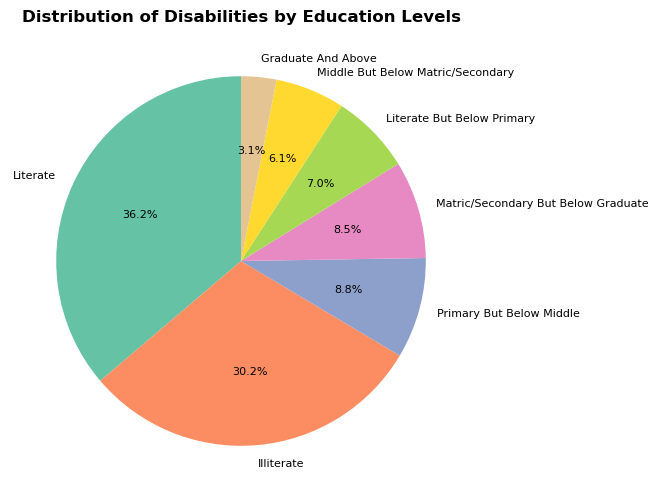

In [19]:
df_Education = df.groupby('Educational Level')['Count'].sum().sort_values(ascending=False)
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494'] 

df_Education.plot(
    kind='pie',
    autopct='%0.1f%%',
    colors=colors,
    startangle=90,
    legend=False,
    figsize=(6, 6),
    textprops={'fontsize': 8}
)

plot.title('Distribution of Disabilities by Education Levels', fontsize=12, weight='bold')
plot.ylabel('')

### Insights:
* Literate individuals (36.2%) have a slightly higher share of disabilities than illiterate individuals (30.2%).
* A significant portion of disabilities is present even among those who have completed primary, secondary, or higher education.
* This challenges the assumption that disability is primarily due to a lack of education or awareness.
### Possible Reasons for Higher Disabilities Among Literate People
* Occupational Hazards: Desk jobs with prolonged sitting, screen time and stressful environments may lead to physical and mental health issues.
* Lifestyle Factors: Sedentary lifestyle, lack of physical activity, poor posture and diet habits.
* Mental Health Awareness: Educated individuals may be more likely to report and seek diagnosis for mental health or less visible disabilities.
* Urban Exposure: Literate people tend to live in urban areas where pollution, noise, and accidents are more common.
* Late Onset Disabilities: Some disabilities develop with age and may affect educated professionals later in life.
### Actionable Insights for the Census Bureau & Policymakers
* Promote routine health checkups in workplaces and schools.
* Encourage ergonomic workplace design and mental health support in offices.
* Launch programs on preventing occupational disabilities, especially in IT and desk-heavy jobs.
* Provide stress management training and promote physical activity at work.
* Integrate disability awareness in school/college curriculums to reduce stigma and improve support networks.
* Improve road safety, air quality and mental health facilities in urban areas where literate populations are concentrated.
* Extend coverage and early support services for people acquiring disabilities post-education.
* Conduct studies to identify trends in lifestyle-linked disabilities among educated individuals.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Seeing'),
  Text(1, 0, 'Hearing'),
  Text(2, 0, 'Speech'),
  Text(3, 0, 'Movement'),
  Text(4, 0, 'Mental Retardation'),
  Text(5, 0, 'Mental Illness'),
  Text(6, 0, 'Any Other'),
  Text(7, 0, 'Multiple Disability')])

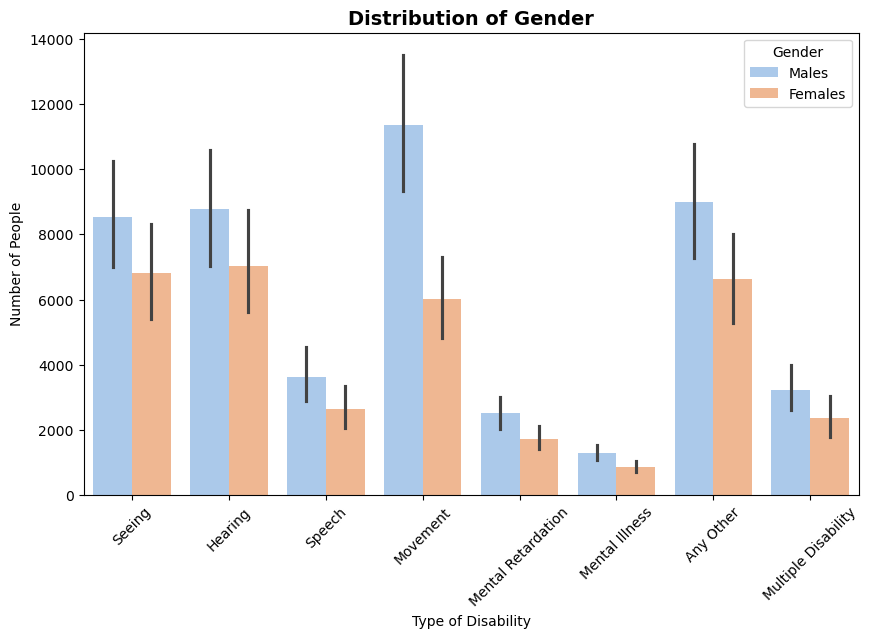

In [12]:
# Analyzing distribution of gender amongst all the types of disabilities

plot.figure(figsize=(10,6))
sns.barplot(x='Disability', y='Count', hue='Gender', palette='pastel', data=df)
plot.title('Distribution of Gender', fontsize=14, weight='bold')
plot.xlabel('Type of Disability')
plot.ylabel('Number of People')
plot.xticks(rotation=45, fontsize=10)

### Insights:
* Males have a higher number of disabilities in almost every category compared to females. This is clearly visible in movement, hearing, seeing, and any other disabilities.
* Movement disability is the most common among both genders. Around 11,000+ males and 6,000+ females are affected by this.
* Hearing and seeing issues also affect a large number of people, especially males.
* Mental illness and mental retardation have the lowest numbers for both genders, but the gap between males and females is still visible.
* Speech disability and multiple disabilities are also more common in males.

### Recommendations:
* Census Bureau investigate why are more males reported with disabilities? Is it due to higher exposure to risky jobs or other social factors?
* The department can try conducting focused surveys to understand the root causes behind this gap.
* They can start awareness programs on preventive care, safe working conditions and early treatment on Movement and Sensory disabilities as these were the most observed disabilities in this dataset.
* Educate people about early signs of disability and the importance of timely medical attention, especially for hearing and seeing problems.
* Set up more rehabilitation centers, mobility aid services and vocational training, especially in rural and low-income areas.
* Use this data to design gender-sensitive disability support schemes, particularly for those with movement and sensory issues.
* Include detailed questions in the next census to capture cause, duration and access to treatment for each disability type.

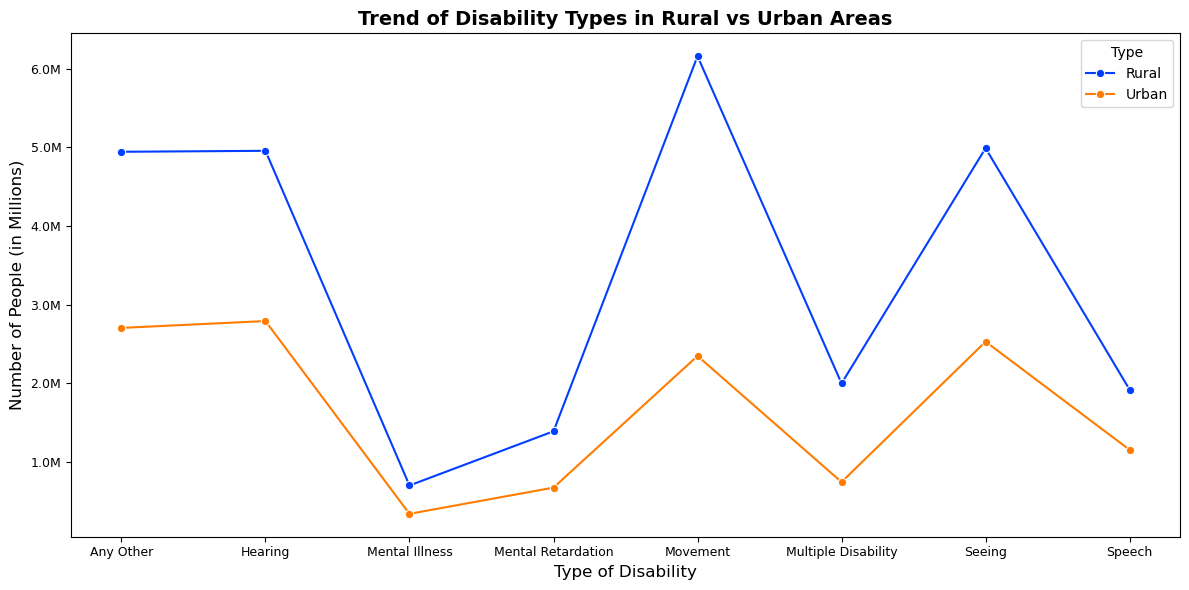

In [13]:
# Analyzing rural vs urban trend per disability

from matplotlib.ticker import FuncFormatter

df_type = df.groupby(['Disability','Type'])['Count'].sum().reset_index()

fig, ax = plot.subplots(figsize=(12, 6))
sns.lineplot(data=df_type, x='Disability', y='Count', hue='Type', marker='o', palette='bright', ax=ax)

ax.set_title('Trend of Disability Types in Rural vs Urban Areas', fontsize=14, weight='bold')
ax.set_ylabel('Number of People (in Millions)', fontsize=12)
ax.set_xlabel('Type of Disability', fontsize=12)

formatter = FuncFormatter(lambda x, pos: f'{x*1e-6:.1f}M')
ax.yaxis.set_major_formatter(formatter)

ax.tick_params(axis='x', rotation=0, labelsize=9)
ax.tick_params(axis='y', labelsize=9)

plot.tight_layout()

### Insights:
* Rural areas have more people with disabilities than urban areas in all categories. The gap is especially large in movement, seeing and hearing disabilities.
* Movement disability is the most common in both rural and urban populations. The count in rural areas is more than double that of urban areas.
* Mental illness and mental retardation have the lowest numbers overall but still show higher rural counts.
* Speech and multiple disabilities also show a clear rural dominance, indicating lack of early intervention.

### Recommendations:
* Set up more primary health centers and early screening programs for disabilities, especially targeting children and elderly in rural areas.
* The high numbers may be due to poor maternal health, malnutrition or lack of awareness. Educational campaigns in rural areas can help.
* Create local skill training centers to empower disabled individuals, especially those with movement and speech impairments.
Encourage more detailed and frequent disability surveys, particularly in rural zones, to understand root causes (e.g., childbirth complications, accidents).
* Partner with rural NGOs working in healthcare and disability to implement assistive technology and services.

## SQL Analysis
* As we observed highest number of disabilities in movement amongst literate people and highest number in seeing amongst illiterate people, let's try to understand it's distribution according to gender.

##### Query 1:
SELECT Disability, `Educational Level`, Gender, SUM(Count) AS Number_Of_People  
FROM CleanedIndiaCensus2011  
WHERE Disability = 'Movement' AND `Educational Level` = 'Literate'  
GROUP BY `Gender`  
ORDER BY Number_Of_People DESC      

##### Disability, Educational Level, Gender, Number_Of_People
Movement, Literate, Males - 2325572  
Movement, Literate, Females - 946942  

##### Query 2:
SELECT Disability, `Educational Level`, Gender, SUM(Count) AS Number_Of_People  
FROM CleanedIndiaCensus2011  
WHERE Disability = 'Seeing' AND `Educational Level` = 'Illiterate'  
GROUP BY `Gender`  
ORDER BY Number_Of_People DESC  

##### Disability, Educational Level, Gender, Number_Of_People  
Seeing, Illiterate, Females - 1384674  
Seeing, Illiterate, Males - 993148  

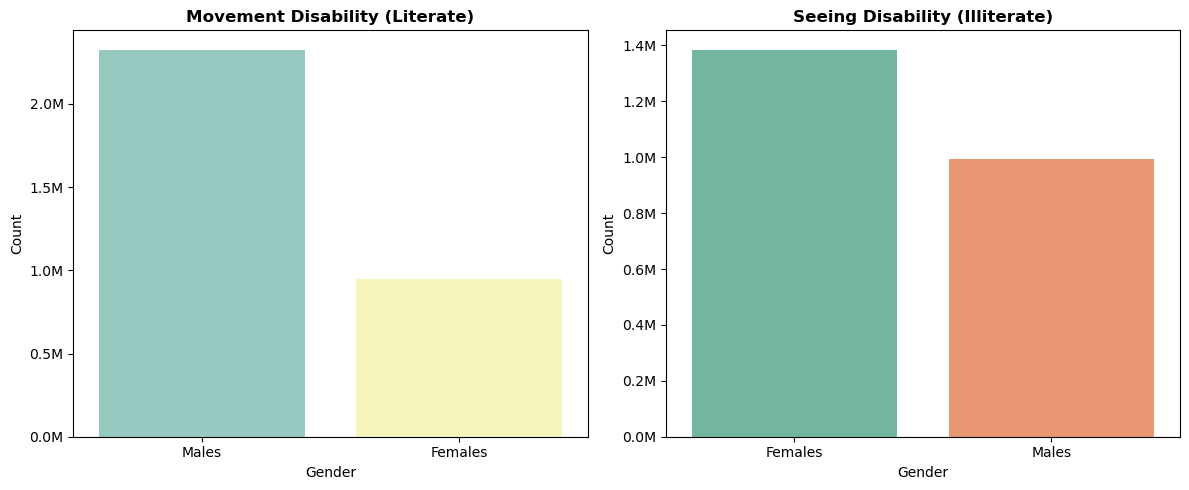

In [39]:
from matplotlib.ticker import FuncFormatter

# Define formatter function for millions
def millions(x, pos):
    return f'{x*1e-6:.1f}M'

fig, axes = plot.subplots(1, 2, figsize=(12, 5))

# Movement Disability among Literate
df_movement = df[(df['Disability'] == 'Movement') & (df['Educational Level'] == 'Literate')].groupby('Gender')['Count'].sum().sort_values(ascending=False).reset_index(name='Count')

sns.barplot(data=df_movement, x='Gender', y='Count', hue='Gender', palette='Set3', ax=axes[0])
axes[0].set_title('Movement Disability (Literate)', fontsize=12, weight='bold')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Gender')
axes[0].yaxis.set_major_formatter(FuncFormatter(millions))

# Seeing Disability among Illiterate
df_seeing = df[(df['Disability'] == 'Seeing') & (df['Educational Level'] == 'Illiterate')].groupby('Gender')['Count'].sum().sort_values(ascending=False).reset_index(name='Count')

sns.barplot(data=df_seeing, x='Gender', y='Count', hue='Gender', palette='Set2', ax=axes[1])
axes[1].set_title('Seeing Disability (Illiterate)', fontsize=12, weight='bold')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Gender')
axes[1].yaxis.set_major_formatter(FuncFormatter(millions))

plot.tight_layout()

### Insights:
* Among individuals with movement disabilities, the number of males is more than twice that of females. This suggests a significant gender gap in movement-related challenges.
* In the case of seeing disabilities, females are more affected than males, with a noticeably higher count reported among women.

### Conclusion:
* After going through comprehensive cleaning and exploratory analysis, the dataset revealed some important insights:
 1. A significantly larger proportion of males reported disabilities across all categories.
 2. Rural areas have a higher population of disabled individuals compared to urban regions.
 3. Surprisingly, the majority of the disabled population are literate while we observed the highest number of illiterate people in the category of multiple disability.
 4. Movement, visual impairments and hearing disabilities were among the most reported, while mental illness and retardation had significantly lower reporting.
 5. There’s a strong need for inclusive education policies and accessibility improvements at the grassroots level.